In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install ta
!pip install statistics
import pandas as pd
import numpy as np
import ta
import yfinance as yf
import matplotlib.pyplot as plt
import csv
import statistics

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=02dd45f465560c78a02366b3766abca044822cd3c5aaa87f57227c338883cdc0
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=3f8f4dacddc00fd675abf8c2ff957364a070eb5d80892d466c060141fd56a7d2
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


##EMA and MACD

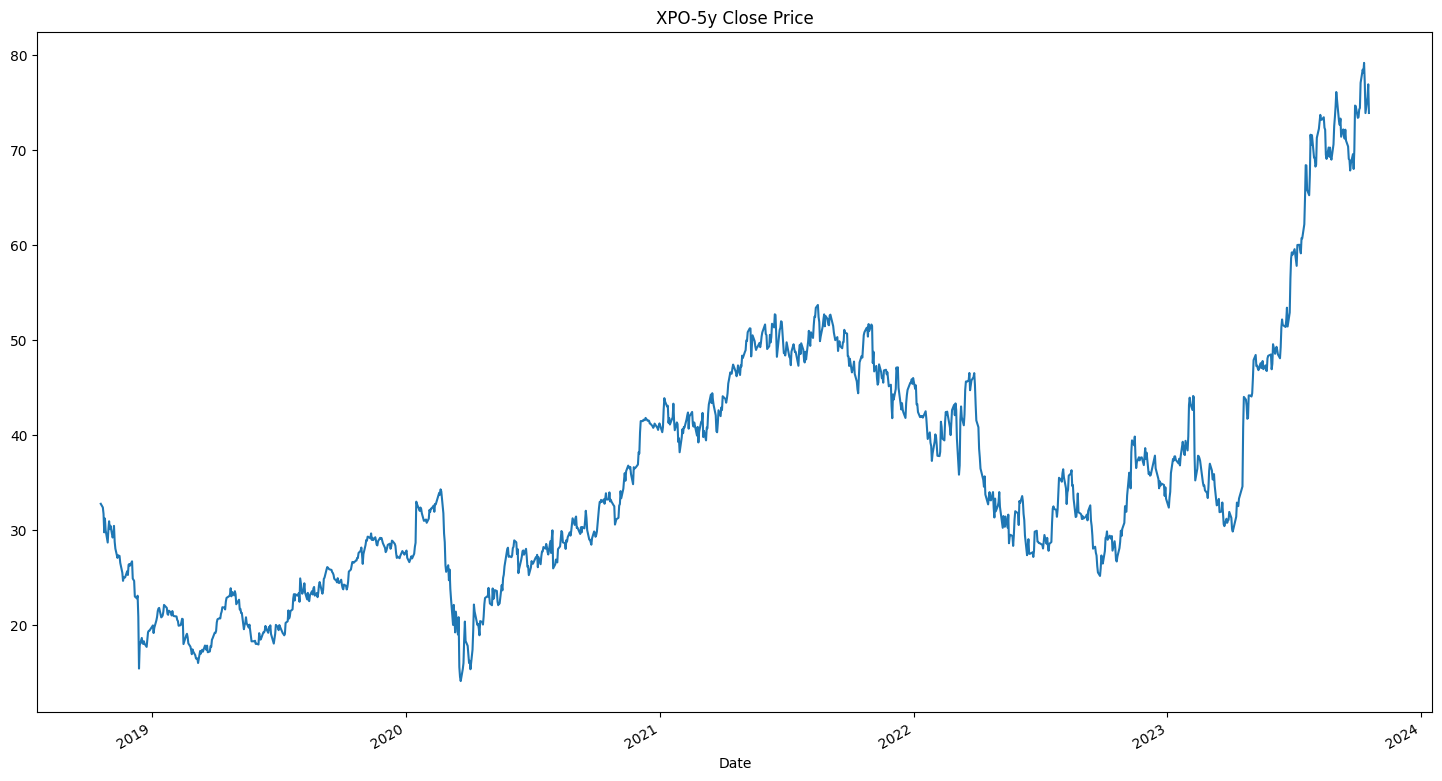

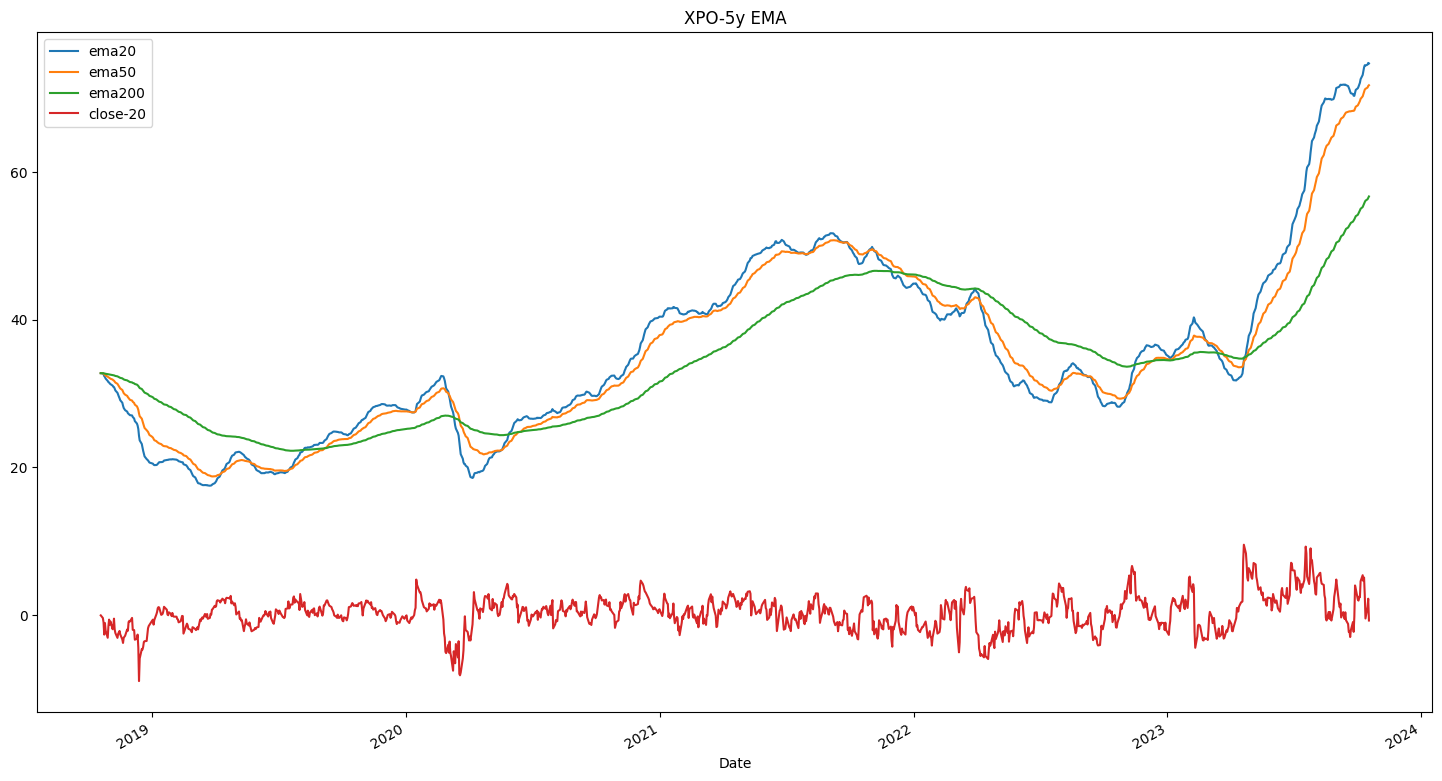

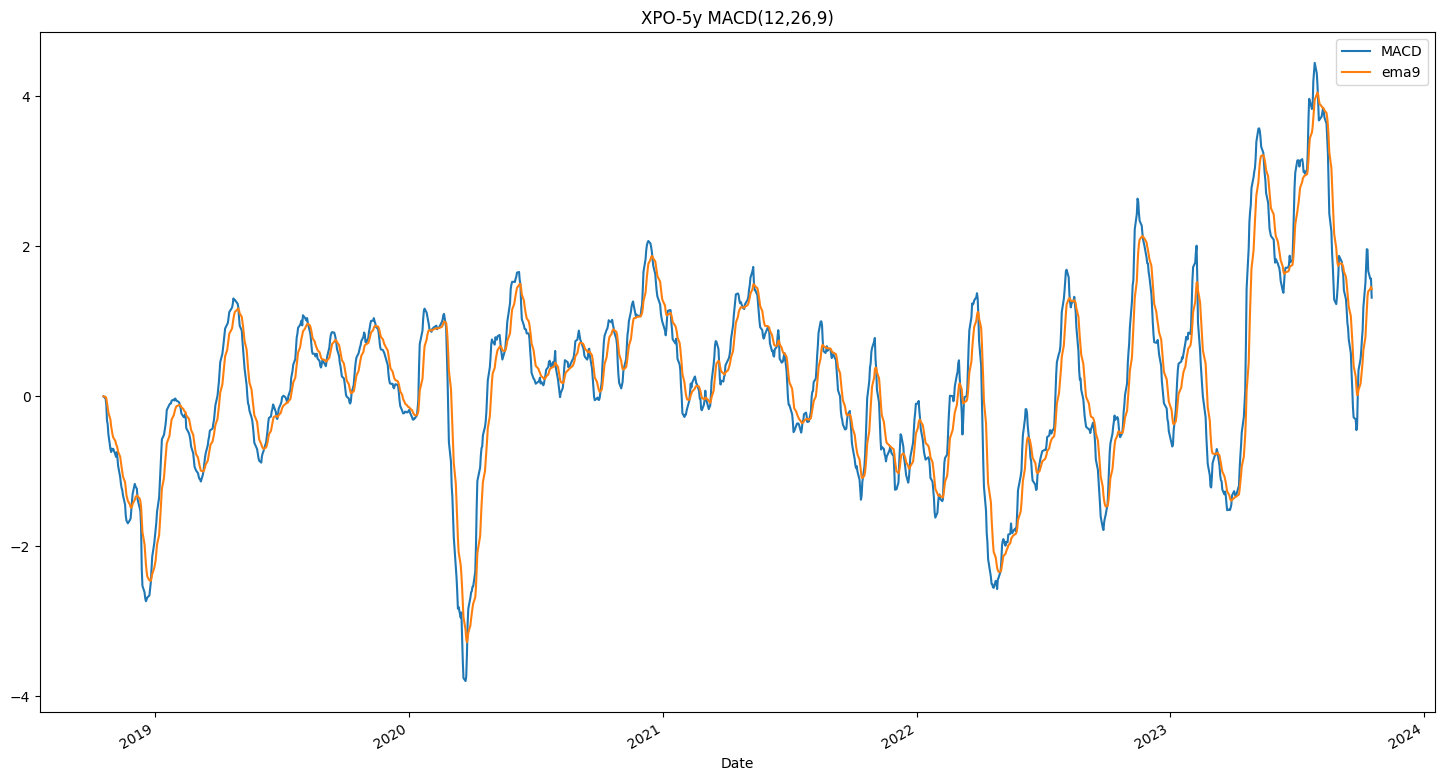

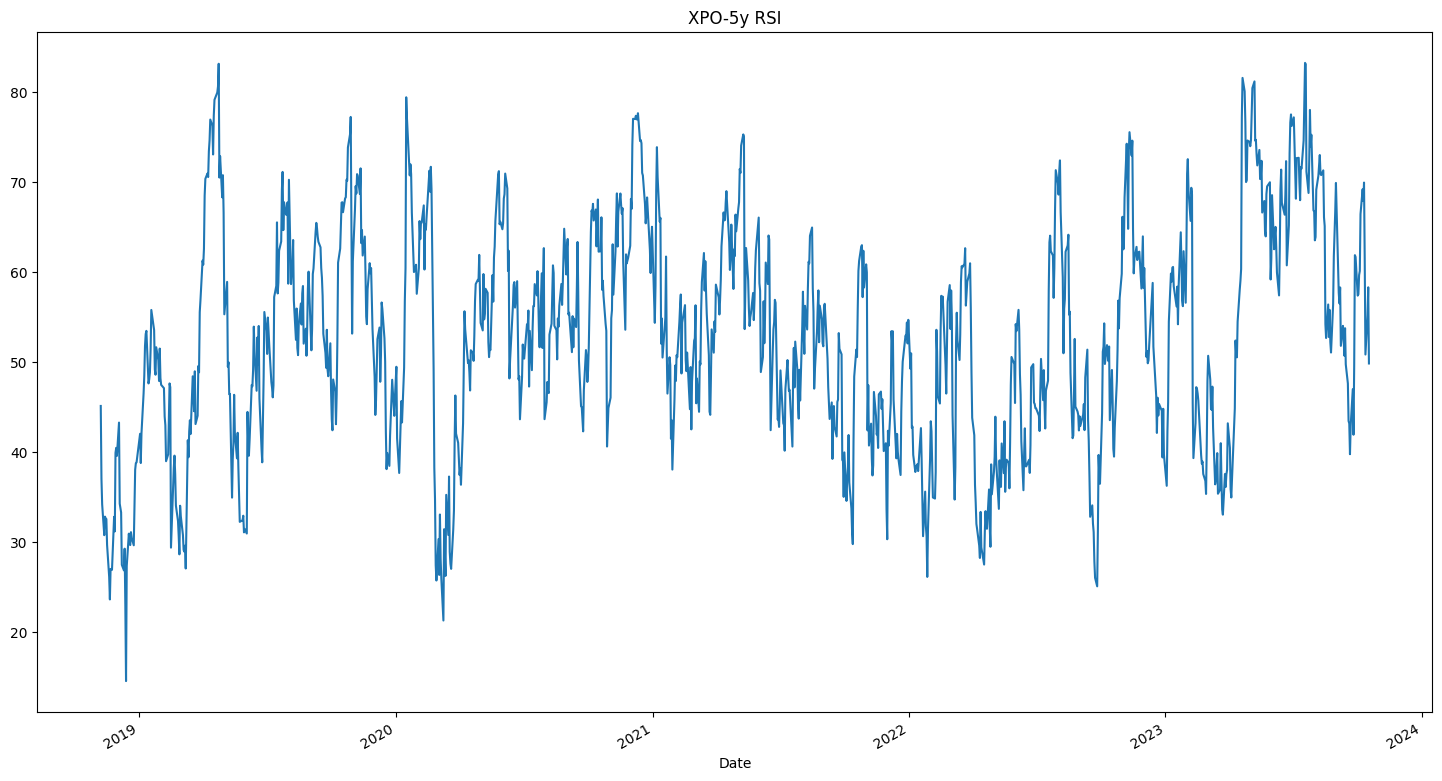

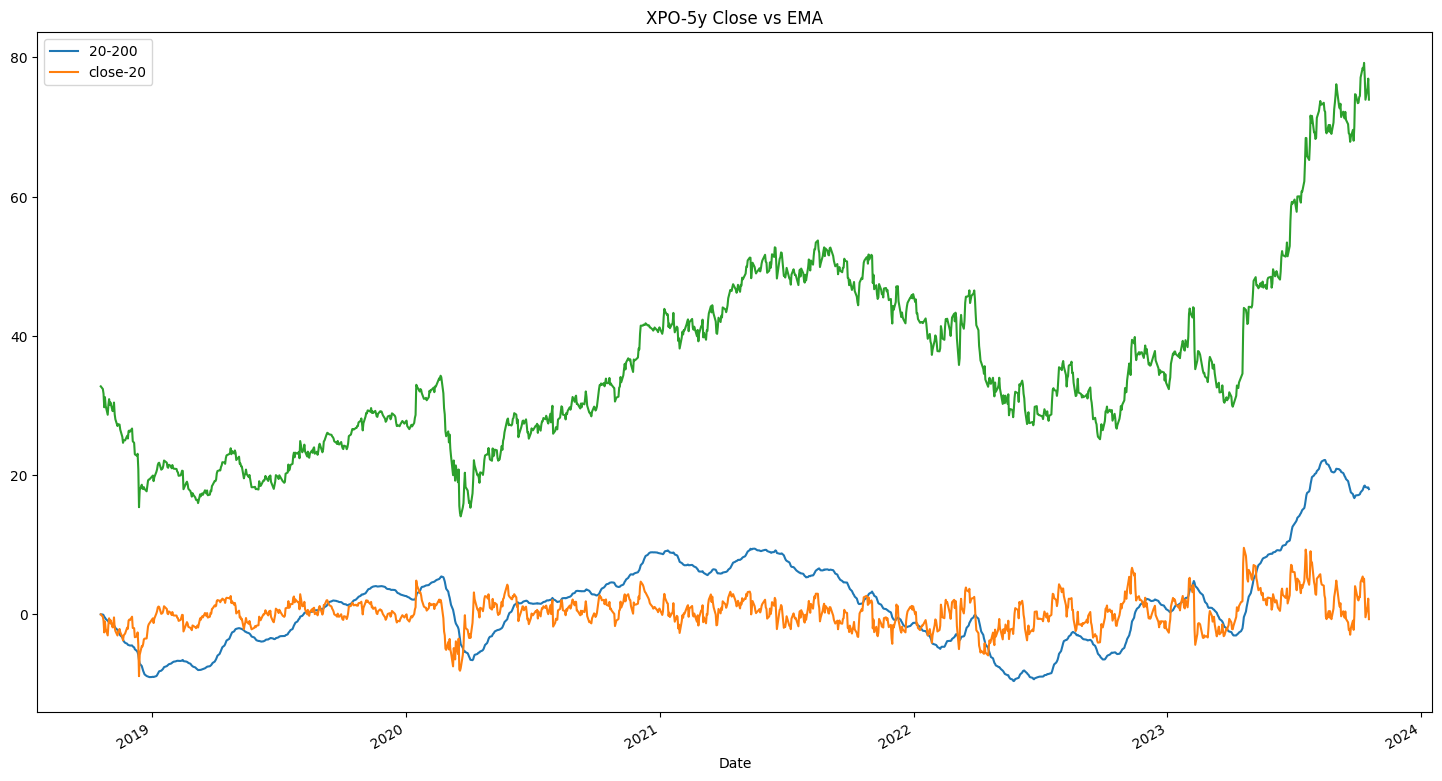

In [ ]:
tickers = [# 'mrna',
'XPO',
# 'RXO'
]


v_list = []
macd_list = []
rsi_list = []
ema_list = []
close_20 = []




for ticker in tickers:
    for year in ['5y']:
        t = yf.Ticker(ticker)
        # period = “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
        # interval = “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
        df = t.history(period = year)
        # df = t.history(start = '2020-03-18', end = '2022-03-20', interval="1d")
        df['long returns'] = np.log(df['Close']/df['Close'].shift())
        volatility = df['long returns'].std()*252**.5
        str_vol = str(round(volatility, 4)*100)
        df['Volatility'] = str_vol
        df['ema20'] = df['Close'].ewm(span=20, adjust=False).mean()
        df['ema50'] = df['Close'].ewm(span=50, adjust=False).mean()
        df['ema200'] = df['Close'].ewm(span=200, adjust=False).mean()
        exp1 = df['Close'].ewm(span=12, adjust=False).mean()
        exp2 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = exp1 - exp2
        df['ema9'] = df['MACD'].ewm(span=9, adjust=False).mean()
        df['Ticker'] = ticker
        df['rsi'] = ta.momentum.rsi(df.Close, window=14)
        df['20-50'] = df['ema20'] - df['ema50']
        df['50-200'] = df['ema50'] - df['ema200']
        df['20-200'] = df['ema20'] - df['ema200']
        df['close-20'] = df['Close'] - df['ema20']
        df['macd()'] = df['MACD'] - df['ema9']
        df_2 = df.loc[:, ['Ticker','Close','20-200','macd()','rsi']]
        # try:
        #   df = df.drop(['High','Low','Volume','Dividends','Stock Splits'], axis=1)
        # except:
        #   KeyError
        df = df.loc[:, ['Ticker','Open','Close','ema20','ema50','ema200','MACD','ema9','20-50','50-200','20-200','close-20','macd()','rsi']]
        # display(df.tail(7))

        fig, ax = plt.subplots()
        df['Close'].plot(ax=ax)
        ax.set_title(ticker + '-' + year + ' Close Price')
        fig.set_size_inches(18, 10, forward=True)
        fig, ax = plt.subplots()
        df[['ema20','ema50','ema200','close-20']].plot(ax=ax)
        ax.set_title(ticker + '-' + year + ' EMA')
        fig.set_size_inches(18, 10, forward=True)
        print()
        fig, ax = plt.subplots()
        df[['MACD','ema9']].plot(ax=ax)
        ax.set_title(ticker + '-' + year + ' MACD(12,26,9)')
        fig.set_size_inches(18, 10, forward=True)
        print()
        fig, ax = plt.subplots()
        df['rsi'].plot(ax=ax)
        fig.set_size_inches(18, 10, forward=True)
        ax.set_title(ticker + '-' + year + ' RSI')



        fig, ax = plt.subplots()
        # df[['20-50']].plot(ax=ax)
        # df[['50-200']].plot(ax=ax)
        df[['20-200']].plot(ax=ax)
        df[['close-20']].plot(ax=ax)
        df['Close'].plot(ax=ax)
        fig.set_size_inches(18, 10, forward=True)
        ax.set_title(ticker + '-' + year + ' Close vs EMA')



In [ ]:
for ticker in tickers:
    for year in ['5y']:
        t = yf.Ticker(ticker)
        # period = “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
        # interval = “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
        df = t.history(period = year)
        # df = t.history(start = '2022-06-10', end = '2022-06-15', interval="1d")
        df['long returns'] = np.log(df['Close']/df['Close'].shift())
        volatility = df['long returns'].std()*252**.5
        str_vol = str(round(volatility, 4)*100)
        df['Volatility'] = str_vol
        df['ema20'] = df['Close'].ewm(span=20, adjust=False).mean()
        df['ema50'] = df['Close'].ewm(span=50, adjust=False).mean()
        df['ema200'] = df['Close'].ewm(span=200, adjust=False).mean()
        exp1 = df['Close'].ewm(span=12, adjust=False).mean()
        exp2 = df['Close'].ewm(span=26, adjust=False).mean()
        df['MACD'] = exp1 - exp2
        df['ema9'] = df['MACD'].ewm(span=9, adjust=False).mean()
        df['Ticker'] = ticker
        df['rsi'] = ta.momentum.rsi(df.Close, window=14)
        df['20-50'] = df['ema20'] - df['ema50']
        df['50-200'] = df['ema50'] - df['ema200']
        df['20-200'] = df['ema20'] - df['ema200']
        df['close-20'] = df['Close'] - df['ema20']
        df['macd()'] = df['MACD'] - df['ema9']
        df_2 = df.loc[:, ['Ticker','Close','20-200','close-20', 'macd()','rsi']]
        # display(df_2.sort_values(by = '20-200', ascending=False).head())

##Volatility

        if float(str_vol) > 50:
          print(ticker +"'s volatility is : " + str(str_vol) + "%. Watch it.")
          vo = '1'
          v_list.append(vo)
        else:
          print(ticker +"'s volatility is less than 50%. No signal.")
          vo = '0'
          v_list.append(vo)


##MACD

        avg_sp = df_2['macd()'].tail(100).mean()
        std = df_2['macd()'].tail(100).std()
        current = df_2.tail(1).iloc[0,3]
        current_sp = current * 2 * std
        rsi = df_2.tail(1).iloc[0,5]
        if current_sp > avg_sp:
            # print('current spread + 2 std is: ')
            # print(current_sp)
            # print('average spread is:')
            # print(avg_sp )
            # print()
            print('Current macd is greater than average macd. Watch it.')
            ma = '1'
            macd_list.append(ma)
        else:
            print('Current macd is less than average macd. No signal.')
            ma = '0'
            macd_list.append(ma)

##RSI

        if rsi < 30:
            print("rsi's value is "+ str(rsi)+', which is less than 30. Watch it.')
            rs = '1'
            rsi_list.append(rs)
        elif rsi > 70:
            print("rsi's value is")
            print(rsi)
            print('It is greater than 70. Watch it.')
            rs = '1'
            rsi_list.append(rs)
        else:
            print(ticker + "rsi's value is "+ str(rsi)+', which is between 30 and 70. No signal.')
            rs = '0'
            rsi_list.append(rs)




##EMA20-200

        current_ema = df_2.tail(1).iloc[0,2]
        ema_max = df_2['20-200'].sort_values(ascending=False).head(100).mean()
        ema_min = df_2['20-200'].sort_values(ascending=True).head(100).mean()

        if current_ema > ema_max:
            print('Current ema20-200 is greater than ema max. Watch it.')
            em = '1'
            ema_list.append(em)
        elif current_ema < ema_min:
            print('Current ema20-200 is less than ema minimum. Watch it.')
            em = '1'
            ema_list.append(em)
        else:
            print('Current ema20-200 is between max and min. No signal.')
            em = '0'
            ema_list.append(em)


##Close-EMA20

        current_close_20 = df_2.tail(1).iloc[0,3]
        close_20_max = df_2['close-20'].sort_values(ascending=False).head(100).mean()
        close_20_min = df_2['close-20'].sort_values(ascending=True).head(100).mean()

        if current_close_20 > close_20_max:
           print('Current close price - ema 20 is greater than max. Watch it.')
           clo = '1'
           close_20.append(clo)
        elif current_close_20 < close_20_min:
           print('Current close price - ema 20 is less than min. Watch it.')
           clo = '1'
           close_20.append(clo)
        else:
           print('Current close price - ema 20  is between max and min. No signal.')
           clo = '0'
           close_20.append(clo)
           print()





XPO's volatility is : 52.239999999999995%. Watch it.
Current macd is less than average macd. No signal.
XPOrsi's value is 46.71310279862543, which is between 30 and 70. No signal.
Current ema20-200 is between max and min. No signal.
Current close price - ema 20  is between max and min. No signal.



In [ ]:


IndicatorList = pd.DataFrame({
    'TICKER': tickers,
    'Volatility': v_list,
    'macd': macd_list,
    "rsi": rsi_list,
    'ema20-200': ema_list,
    'close-20':close_20
})
IndicatorList.apply(lambda x: x)

,TICKER,Volatility,macd,rsi,ema20-200,close-20
0,XPO,1,0,0,0,0


In [ ]:
# Back test

df = t.history(start = '2022-06-10', end = '2022-06-14', interval="1d")
df['long returns'] = np.log(df['Close']/df['Close'].shift())
volatility = df['long returns'].std()*252**.5
str_vol = str(round(volatility, 4)*100)
df['Volatility'] = str_vol
df['ema20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['ema50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['ema200'] = df['Close'].ewm(span=200, adjust=False).mean()
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['ema9'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['Ticker'] = ticker
df['rsi'] = ta.momentum.rsi(df.Close, window=14)
df['20-50'] = df['ema20'] - df['ema50']
df['50-200'] = df['ema50'] - df['ema200']
df['20-200'] = df['ema20'] - df['ema200']
df['macd()'] = df['MACD'] - df['ema9']
df_3 = df.loc[:, ['Ticker','Close','20-200','macd()','rsi']]
# display(df_2.sort_values(by = '20-200', ascending=False).head())

##Volatility

if float(str_vol) > 50:
  print(ticker +"'s volatility is : " + str(str_vol) + "%. Watch it.")
  print()

else:
  print(ticker +"'s volatility is less than 50%. No signal.")



##MACD

avg_sp = df_3['macd()'].tail(100).mean()
std = df_3['macd()'].tail(100).std()
current = df_3.tail(1).iloc[0,3]
current_sp = current * 2 * std
rsi = df_3.tail(1).iloc[0,4]
if current_sp > avg_sp:
    # print('current spread + 2 std is: ')
    # print(current_sp)
    # print('average spread is:')
    # print(avg_sp )
    # print()
    print('Current macd is greater than average macd. Watch it.')
else:
    print('Current macd is less than average macd. No signal.')

##RSI

if rsi < 30:
    print("rsi's value is")
    print('rsi is ' + str(rsi))
    print('It is less than 30. Watch it.')
elif rsi > 70:
    print("rsi's value is")
    print('rsi is ' + str(rsi))
    print('It is greater than 70. Watch it.')
else:
    print('rsi is ' + str(rsi))
    print(ticker + "'s rsi is between 30 and 70. No signal.")

current_ema = df_2.tail(1).iloc[0,2]
ema_max = df_3['20-200'].sort_values(ascending=False).head(30).mean()
ema_min = df_3['20-200'].sort_values(ascending=True).head(30).mean()


##EMA20-200


if current_ema > ema_max:
    print('Current ema20-200 is greater than ema max. Watch it.')
    em = '1'
    ema_list.append(em)
elif current_ema < ema_min:
    print('Current ema20-200 is less than ema minimum. Watch it.')
    em = '1'
    ema_list.append(em)
else:
    print('Current ema20-200 is between max and min. No signal.')
    em = '0'
    ema_list.append(em)
    print()
    print()


XPO's volatility is less than 50%. No signal.
Current macd is greater than average macd. Watch it.
rsi is nan
XPO's rsi is between 30 and 70. No signal.
Current ema20-200 is greater than ema max. Watch it.


In [ ]:
df_3

,Ticker,Close,20-200,macd(),rsi
Date,,,,,
2022-06-10 00:00:00-04:00,XPO,29.399881,0.000000,0.000000,NaN
2022-06-13 00:00:00-04:00,XPO,27.338087,-0.175846,-0.131579,NaN


In [ ]:
    # 'ABNB',
#  'GOOGL',
#   'AMZN',
# 'AAPL',
# 'ARKK',
# 'CSGP',
# 'DOCU',
# 'EQR',
# 'META',
# 'MSFT',
# 'NRDY',
# 'NVDA',
# 'ONL',
# 'O',
# 'SMAR',
# 'STOR',
# 'TCEHY',
# 'KO',
# 'SO',
# 'DIS',
# 'UNP',
# 'VOO',
# 'VCIT',
# 'VAW',
# 'VCSH',
# 'VTIP',
# 'VGSH',
# 'VZ',
# 'V',
# 'ZM',
# 'MINT',
# 'BRK-B',
# 'NVEC',
# 'PFBPX',
# 'MRK',
# '^GSPC',
# 'HLN',
# 'SPY',